# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     945.1
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.57e-41
Time:                        10:21:09   Log-Likelihood:                 1.5977
No. Observations:                  50   AIC:                             4.805
Df Residuals:                      46   BIC:                             12.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0755      0.083     60.944      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60935294  5.08723823  5.52511013  5.89472086  6.17801712  6.37010619
  6.4800598   6.52942364  6.54867749  6.57222747  6.63275323  6.75583874
  6.95576894  7.23318276  7.57496815  7.95641634  8.34528145  8.70707836
  9.01074852  9.23376284  9.36582306  9.41055381  9.38490706  9.31637694
  9.23848256  9.18526092  9.1856747   9.2588538   9.41095231  9.63413747
  9.90787654 10.20231025 10.48315863 10.7173531  10.87846952 10.95106965
 10.93323755 10.83689443 10.68583997 10.51184213 10.34941776 10.23016156
 10.17755522 10.20310935 10.30447241 10.465817   10.66044029 10.85515121
 11.01572365 11.1125197 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.11564341 10.98294542 10.7347521  10.41738477 10.09181852  9.81875346
  9.64375317  9.58608919  9.63402261  9.74767825]


## Plot comparison

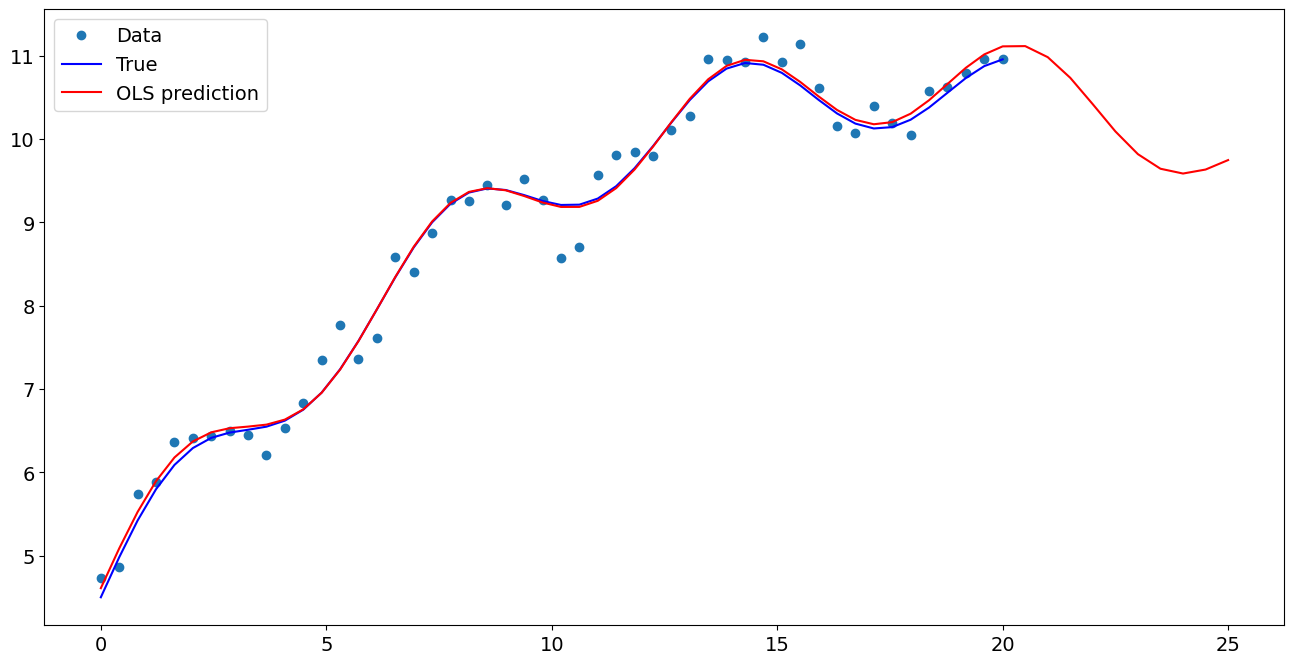

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.075461
x1                  0.487942
np.sin(x1)          0.518316
I((x1 - 5) ** 2)   -0.018644
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.115643
1    10.982945
2    10.734752
3    10.417385
4    10.091819
5     9.818753
6     9.643753
7     9.586089
8     9.634023
9     9.747678
dtype: float64